Total Game Score Model - Model Evaluation - GBM

In [1]:
import pandas as pd
import numpy as np
import joblib
import warnings
warnings.filterwarnings('ignore')

import sys
sys.path.append('..')
from total_points_model.domain.preprocessing.data_preprocessor import DataPreprocessor
from total_points_model.domain.modelling.hyperparameter_tuning import XGBHyperparameterTuner
from total_points_model.domain.modelling.supermodel import SuperXGBRegressor
from total_points_model.domain.modelling.model_evaluation import XGBRegressorEvaluator

pd.options.display.max_rows = 100
pd.options.display.max_columns = 999

%load_ext autoreload
%autoreload 2

Load Data

In [2]:
afl_data = pd.read_csv("/Users/ciaran/Documents/Projects/AFL/total-points-score-model/data/merged-data/afl_match_data.csv")

In [3]:
afl_data['ModellingFilter'] = np.where(afl_data['Date'] < "2019-01-01", True, False)
afl_data = afl_data[afl_data['Year'] >= 2010]

afl_data = afl_data.rename(columns = {'Total Game Score':'Total_Game_Score'})

In [4]:
training_data = afl_data[afl_data['ModellingFilter']]
test_data = afl_data[~afl_data['ModellingFilter']]

In [5]:
response = "Total_Game_Score"

In [6]:
X_train, y_train = training_data.drop(columns = [response]), training_data[response]
X_test, y_test = test_data.drop(columns = [response]), test_data[response]

Preprocess Data

In [7]:
afl_rename_dict = {
    'Total Game Score':'Total_Game_Score',
    'Home Win':'Home_Win'
    }

In [8]:
preprocessor = DataPreprocessor(rename_dict=afl_rename_dict)

In [9]:
preprocessor.fit(X_train)

DataPreprocessor(rename_dict={'Home Win': 'Home_Win',
                              'Total Game Score': 'Total_Game_Score'})

In [10]:
X_train_preproc = preprocessor.transform(X_train)
X_test_preproc = preprocessor.transform(X_test)

In [11]:
X_train_preproc.head()

,Year,Temperature,random5,Home_Total_Q1_Score_avg2,Home_Total_Q1_Goals_avg2,Home_Total_Q1_Behinds_avg2,Home_Total_Q1_Shots_avg2,Home_Total_Q1_Conversion_avg2,Home_Total_Q2_Score_avg2,Home_Total_Q2_Goals_avg2,Home_Total_Q2_Behinds_avg2,Home_Total_Q2_Shots_avg2,Home_Total_Q2_Conversion_avg2,Home_Total_Q3_Score_avg2,Home_Total_Q3_Goals_avg2,Home_Total_Q3_Behinds_avg2,Home_Total_Q3_Shots_avg2,Home_Total_Q3_Conversion_avg2,Home_Total_Q4_Score_avg2,Home_Total_Q4_Goals_avg2,Home_Total_Q4_Behinds_avg2,Home_Total_Q4_Shots_avg2,Home_Total_Q4_Conversion_avg2,Home_Att_Q1_Score_avg2,Home_Att_Q1_Goals_avg2,Home_Att_Q1_Behinds_avg2,Home_Att_Q1_Shots_avg2,Home_Att_Q1_Conversion_avg2,Home_Att_Q2_Score_avg2,Home_Att_Q2_Goals_avg2,Home_Att_Q2_Behinds_avg2,Home_Att_Q2_Shots_avg2,Home_Att_Q2_Conversion_avg2,Home_Att_Q3_Score_avg2,Home_Att_Q3_Goals_avg2,Home_Att_Q3_Behinds_avg2,Home_Att_Q3_Shots_avg2,Home_Att_Q3_Conversion_avg2,Home_Att_Q4_Score_avg2,Home_Att_Q4_Goals_avg2,Home_Att_Q4_Behinds_avg2,Home_Att_Q4_Shots_avg2,Home_Att_Q4_Conversion_avg2,Home_Def_Q1_Score_avg2,Home_Def_Q1_Goals_avg2,Home_Def_Q1_Behinds_avg2,Home_Def_Q1_Shots_avg2,Home_Def_Q1_Conversion_avg2,Home_Def_Q2_Score_avg2,Home_Def_Q2_Goals_avg2,Home_Def_Q2_Behinds_avg2,Home_Def_Q2_Shots_avg2,Home_Def_Q2_Conversion_avg2,Home_Def_Q3_Score_avg2,Home_Def_Q3_Goals_avg2,Home_Def_Q3_Behinds_avg2,Home_Def_Q3_Shots_avg2,Home_Def_Q3_Conversion_avg2,Home_Def_Q4_Score_avg2,Home_Def_Q4_Goals_avg2,Home_Def_Q4_Behinds_avg2,Home_Def_Q4_Shots_avg2,Home_Def_Q4_Conversion_avg2,Away_Total_Q1_Score_avg2,Away_Total_Q1_Goals_avg2,Away_Total_Q1_Behinds_avg2,Away_Total_Q1_Shots_avg2,Away_Total_Q1_Conversion_avg2,Away_Total_Q2_Score_avg2,Away_Total_Q2_Goals_avg2,Away_Total_Q2_Behinds_avg2,Away_Total_Q2_Shots_avg2,Away_Total_Q2_Conversion_avg2,Away_Total_Q3_Score_avg2,Away_Total_Q3_Goals_avg2,Away_Total_Q3_Behinds_avg2,Away_Total_Q3_Shots_avg2,Away_Total_Q3_Conversion_avg2,Away_Total_Q4_Score_avg2,Away_Total_Q4_Goals_avg2,Away_Total_Q4_Behinds_avg2,Away_Total_Q4_Shots_avg2,Away_Total_Q4_Conversion_avg2,Away_Att_Q1_Score_avg2,Away_Att_Q1_Goals_avg2,Away_Att_Q1_Behinds_avg2,Away_Att_Q1_Shots_avg2,Away_Att_Q1_Conversion_avg2,Away_Att_Q2_Score_avg2,Away_Att_Q2_Goals_avg2,Away_Att_Q2_Behinds_avg2,Away_Att_Q2_Shots_avg2,Away_Att_Q2_Conversion_avg2,Away_Att_Q3_Score_avg2,Away_Att_Q3_Goals_avg2,Away_Att_Q3_Behinds_avg2,Away_Att_Q3_Shots_avg2,Away_Att_Q3_Conversion_avg2,Away_Att_Q4_Score_avg2,Away_Att_Q4_Goals_avg2,Away_Att_Q4_Behinds_avg2,Away_Att_Q4_Shots_avg2,Away_Att_Q4_Conversion_avg2,Away_Def_Q1_Score_avg2,Away_Def_Q1_Goals_avg2,Away_Def_Q1_Behinds_avg2,Away_Def_Q1_Shots_avg2,Away_Def_Q1_Conversion_avg2,Away_Def_Q2_Score_avg2,Away_Def_Q2_Goals_avg2,Away_Def_Q2_Behinds_avg2,Away_Def_Q2_Shots_avg2,Away_Def_Q2_Conversion_avg2,Away_Def_Q3_Score_avg2,Away_Def_Q3_Goals_avg2,Away_Def_Q3_Behinds_avg2,Away_Def_Q3_Shots_avg2,Away_Def_Q3_Conversion_avg2,Away_Def_Q4_Score_avg2,Away_Def_Q4_Goals_avg2,Away_Def_Q4_Behinds_avg2,Away_Def_Q4_Shots_avg2,Away_Def_Q4_Conversion_avg2,Home_Team_Adelaide,Home_Team_Brisbane Lions,Home_Team_Carlton,Home_Team_Collingwood,Home_Team_Essendon,Home_Team_Fremantle,Home_Team_Geelong,Home_Team_Gold Coast,Home_Team_Greater Western Sydney,Home_Team_Hawthorn,Home_Team_Melbourne,Home_Team_North Melbourne,Home_Team_Port Adelaide,Home_Team_Richmond,Home_Team_St Kilda,Home_Team_Sydney,Home_Team_West Coast,Home_Team_Western Bulldogs,Away_Team_Adelaide,Away_Team_Brisbane Lions,Away_Team_Carlton,Away_Team_Collingwood,Away_Team_Essendon,Away_Team_Fremantle,Away_Team_Geelong,Away_Team_Gold Coast,Away_Team_Greater Western Sydney,Away_Team_Hawthorn,Away_Team_Melbourne,Away_Team_North Melbourne,Away_Team_Port Adelaide,Away_Team_Richmond,Away_Team_St Kilda,Away_Team_Sydney,Away_Team_West Coast,Away_Team_Western Bulldogs,Venue_Adelaide Oval,Venue_Bellerive Oval,Venue_Carrara,Venue_Cazalys Stadium,Venue_Docklands,Venue_Eureka Stadium,Venue_Football Park,Venue_Gabba,Venue_Kardinia Park,Venue_M.C.G.,Venue_Manuka 

In [12]:
X_train_preproc.shape, X_test_preproc.shape

((1830, 449), (783, 449))

Load Model

In [13]:
xgb_model = joblib.load("/Users/ciaran/Documents/Projects/AFL/total-points-score-model/afl-total-points-model/total_points_model/models/xgb_regression_test_v1.joblib")

Get Predictions

In [14]:
train_preds = xgb_model.predict(X_train_preproc)
test_preds = xgb_model.predict(X_test_preproc)

Evaluate Model

In [16]:
test_evaluation_data = X_test_preproc.copy()
test_evaluation_data['xgb_preds'] = xgb_model.predict(X_test_preproc)
test_evaluation_data[response] = y_test
test_evaluation_data.head()

,Year,Temperature,random5,Home_Total_Q1_Score_avg2,Home_Total_Q1_Goals_avg2,Home_Total_Q1_Behinds_avg2,Home_Total_Q1_Shots_avg2,Home_Total_Q1_Conversion_avg2,Home_Total_Q2_Score_avg2,Home_Total_Q2_Goals_avg2,Home_Total_Q2_Behinds_avg2,Home_Total_Q2_Shots_avg2,Home_Total_Q2_Conversion_avg2,Home_Total_Q3_Score_avg2,Home_Total_Q3_Goals_avg2,Home_Total_Q3_Behinds_avg2,Home_Total_Q3_Shots_avg2,Home_Total_Q3_Conversion_avg2,Home_Total_Q4_Score_avg2,Home_Total_Q4_Goals_avg2,Home_Total_Q4_Behinds_avg2,Home_Total_Q4_Shots_avg2,Home_Total_Q4_Conversion_avg2,Home_Att_Q1_Score_avg2,Home_Att_Q1_Goals_avg2,Home_Att_Q1_Behinds_avg2,Home_Att_Q1_Shots_avg2,Home_Att_Q1_Conversion_avg2,Home_Att_Q2_Score_avg2,Home_Att_Q2_Goals_avg2,Home_Att_Q2_Behinds_avg2,Home_Att_Q2_Shots_avg2,Home_Att_Q2_Conversion_avg2,Home_Att_Q3_Score_avg2,Home_Att_Q3_Goals_avg2,Home_Att_Q3_Behinds_avg2,Home_Att_Q3_Shots_avg2,Home_Att_Q3_Conversion_avg2,Home_Att_Q4_Score_avg2,Home_Att_Q4_Goals_avg2,Home_Att_Q4_Behinds_avg2,Home_Att_Q4_Shots_avg2,Home_Att_Q4_Conversion_avg2,Home_Def_Q1_Score_avg2,Home_Def_Q1_Goals_avg2,Home_Def_Q1_Behinds_avg2,Home_Def_Q1_Shots_avg2,Home_Def_Q1_Conversion_avg2,Home_Def_Q2_Score_avg2,Home_Def_Q2_Goals_avg2,Home_Def_Q2_Behinds_avg2,Home_Def_Q2_Shots_avg2,Home_Def_Q2_Conversion_avg2,Home_Def_Q3_Score_avg2,Home_Def_Q3_Goals_avg2,Home_Def_Q3_Behinds_avg2,Home_Def_Q3_Shots_avg2,Home_Def_Q3_Conversion_avg2,Home_Def_Q4_Score_avg2,Home_Def_Q4_Goals_avg2,Home_Def_Q4_Behinds_avg2,Home_Def_Q4_Shots_avg2,Home_Def_Q4_Conversion_avg2,Away_Total_Q1_Score_avg2,Away_Total_Q1_Goals_avg2,Away_Total_Q1_Behinds_avg2,Away_Total_Q1_Shots_avg2,Away_Total_Q1_Conversion_avg2,Away_Total_Q2_Score_avg2,Away_Total_Q2_Goals_avg2,Away_Total_Q2_Behinds_avg2,Away_Total_Q2_Shots_avg2,Away_Total_Q2_Conversion_avg2,Away_Total_Q3_Score_avg2,Away_Total_Q3_Goals_avg2,Away_Total_Q3_Behinds_avg2,Away_Total_Q3_Shots_avg2,Away_Total_Q3_Conversion_avg2,Away_Total_Q4_Score_avg2,Away_Total_Q4_Goals_avg2,Away_Total_Q4_Behinds_avg2,Away_Total_Q4_Shots_avg2,Away_Total_Q4_Conversion_avg2,Away_Att_Q1_Score_avg2,Away_Att_Q1_Goals_avg2,Away_Att_Q1_Behinds_avg2,Away_Att_Q1_Shots_avg2,Away_Att_Q1_Conversion_avg2,Away_Att_Q2_Score_avg2,Away_Att_Q2_Goals_avg2,Away_Att_Q2_Behinds_avg2,Away_Att_Q2_Shots_avg2,Away_Att_Q2_Conversion_avg2,Away_Att_Q3_Score_avg2,Away_Att_Q3_Goals_avg2,Away_Att_Q3_Behinds_avg2,Away_Att_Q3_Shots_avg2,Away_Att_Q3_Conversion_avg2,Away_Att_Q4_Score_avg2,Away_Att_Q4_Goals_avg2,Away_Att_Q4_Behinds_avg2,Away_Att_Q4_Shots_avg2,Away_Att_Q4_Conversion_avg2,Away_Def_Q1_Score_avg2,Away_Def_Q1_Goals_avg2,Away_Def_Q1_Behinds_avg2,Away_Def_Q1_Shots_avg2,Away_Def_Q1_Conversion_avg2,Away_Def_Q2_Score_avg2,Away_Def_Q2_Goals_avg2,Away_Def_Q2_Behinds_avg2,Away_Def_Q2_Shots_avg2,Away_Def_Q2_Conversion_avg2,Away_Def_Q3_Score_avg2,Away_Def_Q3_Goals_avg2,Away_Def_Q3_Behinds_avg2,Away_Def_Q3_Shots_avg2,Away_Def_Q3_Conversion_avg2,Away_Def_Q4_Score_avg2,Away_Def_Q4_Goals_avg2,Away_Def_Q4_Behinds_avg2,Away_Def_Q4_Shots_avg2,Away_Def_Q4_Conversion_avg2,Home_Team_Adelaide,Home_Team_Brisbane Lions,Home_Team_Carlton,Home_Team_Collingwood,Home_Team_Essendon,Home_Team_Fremantle,Home_Team_Geelong,Home_Team_Gold Coast,Home_Team_Greater Western Sydney,Home_Team_Hawthorn,Home_Team_Melbourne,Home_Team_North Melbourne,Home_Team_Port Adelaide,Home_Team_Richmond,Home_Team_St Kilda,Home_Team_Sydney,Home_Team_West Coast,Home_Team_Western Bulldogs,Away_Team_Adelaide,Away_Team_Brisbane Lions,Away_Team_Carlton,Away_Team_Collingwood,Away_Team_Essendon,Away_Team_Fremantle,Away_Team_Geelong,Away_Team_Gold Coast,Away_Team_Greater Western Sydney,Away_Team_Hawthorn,Away_Team_Melbourne,Away_Team_North Melbourne,Away_Team_Port Adelaide,Away_Team_Richmond,Away_Team_St Kilda,Away_Team_Sydney,Away_Team_West Coast,Away_Team_Western Bulldogs,Venue_Adelaide Oval,Venue_Bellerive Oval,Venue_Carrara,Venue_Cazalys Stadium,Venue_Docklands,Venue_Eureka Stadium,Venue_Football Park,Venue_Gabba,Venue_Kardinia Park,Venue_M.C.G.,Venue_Manuka 

In [17]:
test_xgb_evals = XGBRegressorEvaluator(model = xgb_model,
                                       data = test_evaluation_data,
                                       actual_name = response,
                                       expected_name = "xgb_preds"
                                       )

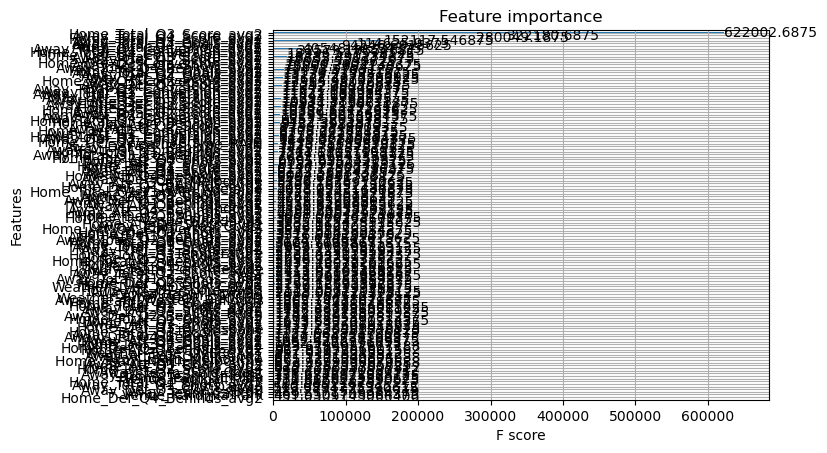

In [18]:
test_xgb_evals.plot_feature_importance()

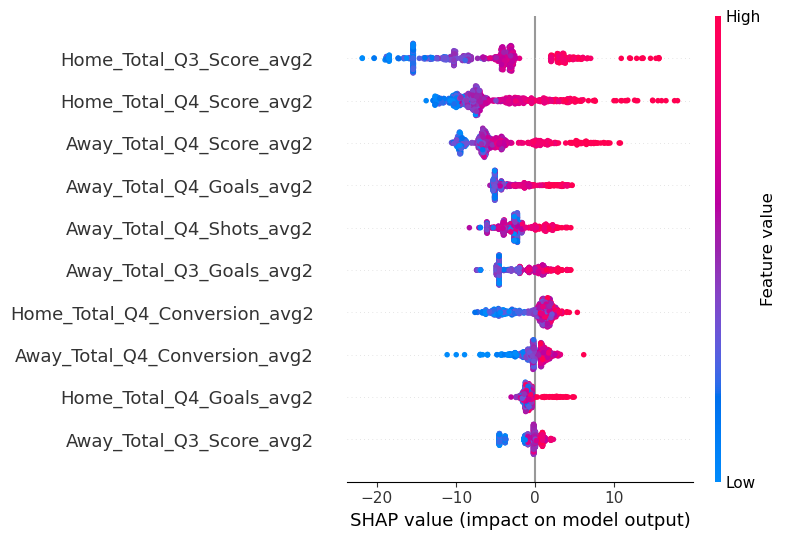

In [19]:
test_xgb_evals.plot_shap_summary_plot()

In [20]:
feature_list = [
    'Home_Total_Q4_Score_avg2'
]

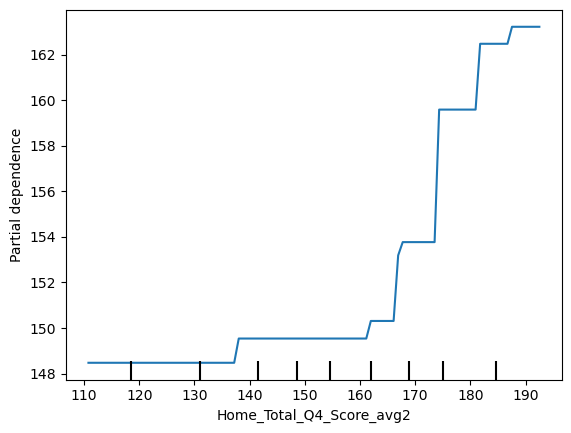

In [21]:
test_xgb_evals.plot_pdp(feature_list)

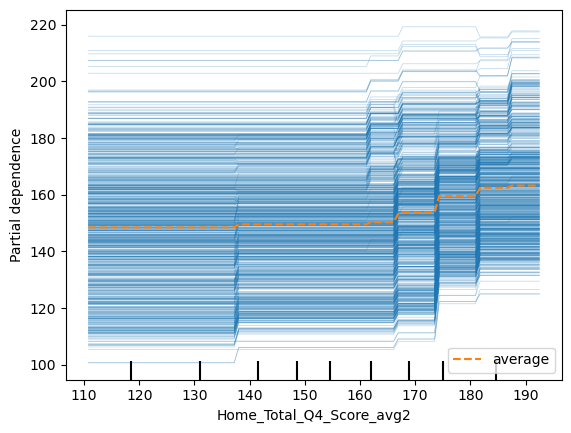

In [22]:
test_xgb_evals.plot_ice(feature_list)

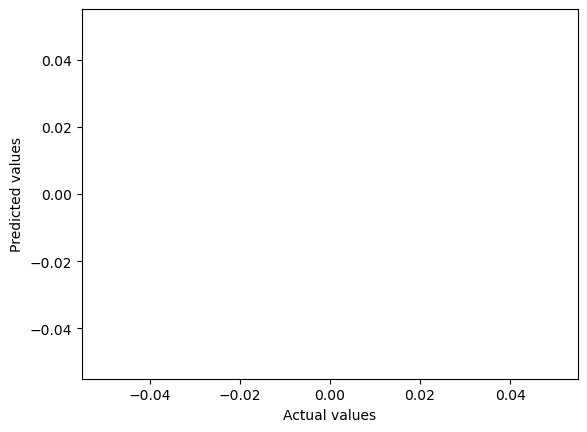

In [23]:
test_xgb_evals.plot_ave()

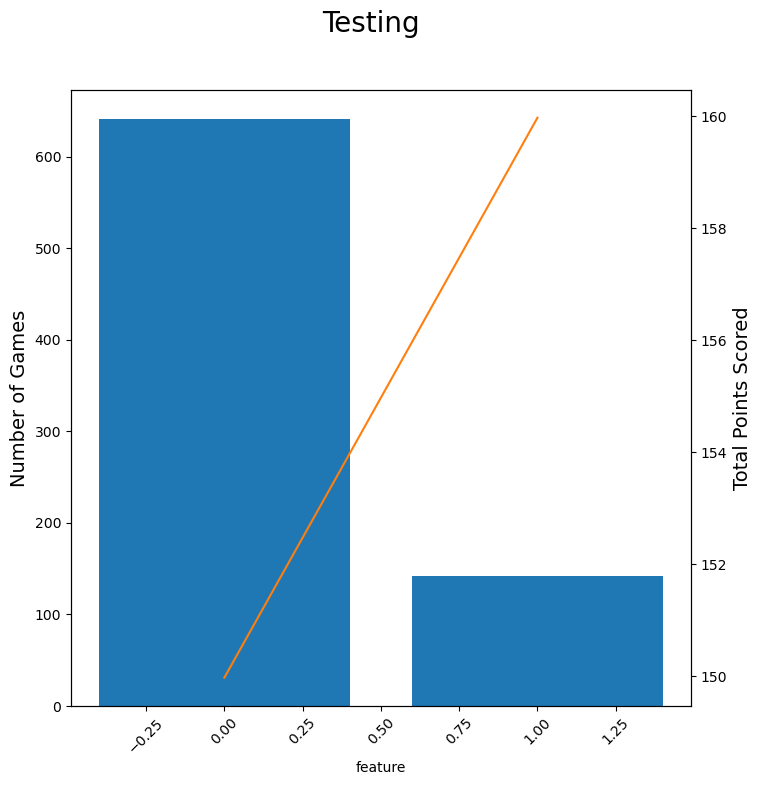

In [24]:
test_xgb_evals.plot_feature_ave('Venue_Docklands')

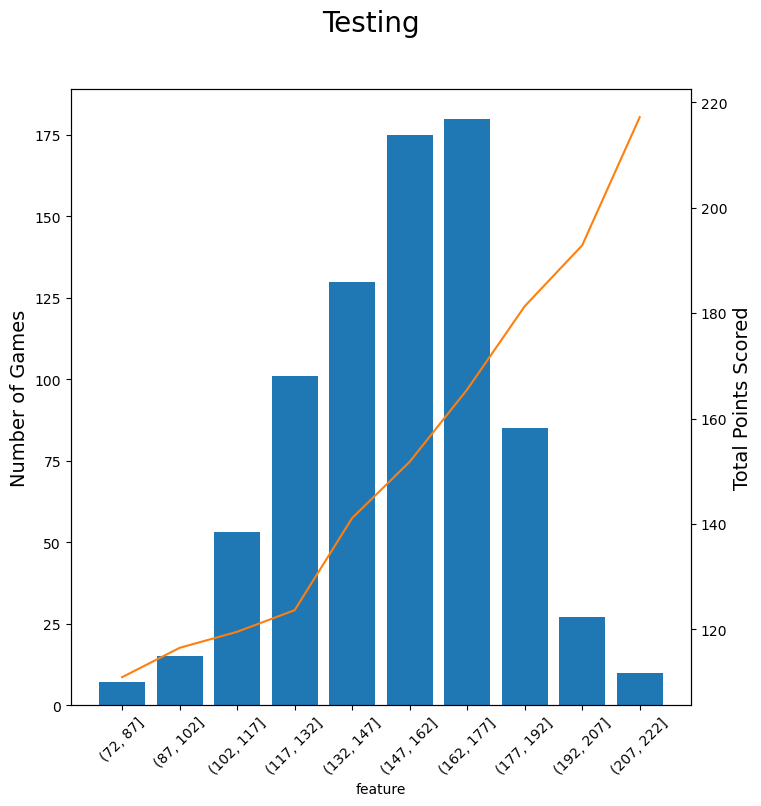

In [26]:
test_xgb_evals.plot_feature_ave('Home_Total_Q4_Score_avg2')

In [27]:
test_xgb_evals.get_mae()

ValueError: Input contains NaN.

In [28]:
test_xgb_evals.get_mse()

ValueError: Input contains NaN.

In [29]:
test_xgb_evals.get_r2_score()

ValueError: Input contains NaN.